In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
# Gaussian Example

sig = 5.0        # Gaussian sigma
l   = 1.0        # wavenumber of particle

# Gaussian parameter (Griffiths):
def calc_a(sig):
    return 1/(4*sig**2)

a = calc_a(sig)

print("sig = ", 1/(2*a**0.5))
print("a = ", 1/(4*sig**2))
    
def psi(x):
    return (2*a/np.pi)**0.25*np.exp(-a*x**2)*np.exp(1j*l*x)

def tpsi(x,t):
    top = complex(1,-2*a*t)
    bot = (1+4*(a*t)**2)
    ogammasq = top/bot 
    ogamma   = np.sqrt(top)/np.sqrt(bot)
    #gammasq = 1
    #gamma   = 1    
    return (2*a/np.pi)**0.25*ogamma * np.exp(-a*(x-l*t)**2*ogammasq)*np.exp(1j*l*(x-l*t/2))

xf = np.linspace(-50,50,1000)
t=2

plt.plot(xf,np.real(tpsi(xf,t)),"b-")
plt.plot(xf,np.imag(tpsi(xf,t)),"r-")
plt.plot(xf,np.absolute(tpsi(xf,t)),"k-")

sig =  5.0
a =  0.01


In [24]:
file_name = "stationary"
total_frames = 601
scene_i = 0
xf = 0
text_a=0
text_b=0
text_c=0

def init_scenes(ax):
    global xf
    global text_a, text_b, text_c
    print("preparing sationary Free Particle Scenes")    
    ax .set_xlim (-50,50)
    ax .set_ylim (-0.5,0.5)
    ax .set_xlabel("$x$")
    ax .set_ylabel("$\psi(x)$")
    ax .set_title("Gaussian Wave Packet")
    xf = np.linspace(-100,100,1000)
    # constant text:
    plt.text(0.01, 0.95, r"$L = 1$,", transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.16, 0.95, r"$\tau = m L^2 /\hbar$", transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.01, 0.02, r"1 second = {} $\tau$".format(np.round(second_tau,2)), transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.98, 0.02, 'Mulhearn UC Davis',transform = ax.transAxes, horizontalalignment='right')
    # dynamic text:
    text_a = plt.text(0, 0, "")
    text_b = plt.text(0, 0, "")
    text_c = plt.text(0, 0, "")
    text_a.set_visible(False)
    text_b.set_visible(False)
    text_c.set_visible(False)    
        
def update_scene(i):
    global text_a, text_b, text_c
    global scene_i
    global sig, a, l
    global psif
    text_a.set_visible(False)
    scene_i = scene_i + 1
    text_a = plt.text(0.5, 0.05, r"$t/\tau = {}$".format(scene_i*tstep), transform = ax.transAxes, horizontalalignment='center')
    
    if (i==0):
        scene_i = 0
        sig = 5;
        l   = 0;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')
    if (i==300):
        scene_i = 0
        sig = 2;
        l   = 0;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')                    
        
    psif = tpsi(xf,scene_i*tstep)

In [27]:
file_name = "wave_packet"
total_frames = 800
scene_i = 0
xf = 0
text_a=0
text_b=0
text_c=0

def init_scenes(ax):
    global xf
    global text_a, text_b, text_c
    print("preparting Free Particle Scenes")    
    ax .set_xlim (0,200)
    ax .set_ylim (-0.4,0.4)
    ax .set_xlabel("$x$")
    ax .set_ylabel("$\psi(x)$")
    ax .set_title("Gaussian Wave Packet")
    xf = np.linspace(0,200,1000)
    # constant text:
    plt.text(0.01, 0.95, r"$L = 1$,", transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.16, 0.95, r"$\tau = m L^2 /\hbar$", transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.01, 0.02, r"1 second = {} $\tau$".format(np.round(second_tau,2)), transform = ax.transAxes, horizontalalignment='left')
    plt.text(0.98, 0.02, 'Mulhearn UC Davis',transform = ax.transAxes, horizontalalignment='right')
    # dynamic text:
    text_a = plt.text(0, 0, "")
    text_b = plt.text(0, 0, "")
    text_c = plt.text(0, 0, "")
    text_a.set_visible(False)
    text_b.set_visible(False)
    text_c.set_visible(False)    
        
def update_scene(i):
    global text_a, text_b, text_c
    global scene_i
    global sig, a, l
    global psif
    text_a.set_visible(False)
    text_a = plt.text(0.5, 0.05, r"$t/\tau = {}$".format(scene_i*tstep), transform = ax.transAxes, horizontalalignment='center')
    scene_i = scene_i + 1
    
    if (i==0):
        scene_i = 0
        sig = 5;
        l   = 1;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')
    if (i==320):
        scene_i = 0
        sig = 5;
        l   = 2;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')            
    if (i==450):
        scene_i = 0
        sig = 5;
        l   = 4;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')            
    if (i==525):
        scene_i = 0
        sig = 1;
        l   = 2;
        a   = calc_a(sig)
        text_b.set_visible(False)
        text_b = plt.text(0.01, 0.90, r"$v\tau = {}$,".format(np.round(l,2)), transform = ax.transAxes, horizontalalignment='left')
        text_c.set_visible(False)
        text_c = plt.text(0.16, 0.90, r"$\sigma= {}$".format(np.round(sig,2)), transform = ax.transAxes, horizontalalignment='left')            



        
        
    psif = tpsi(xf,scene_i*tstep)
    

<IPython.core.display.Javascript object>


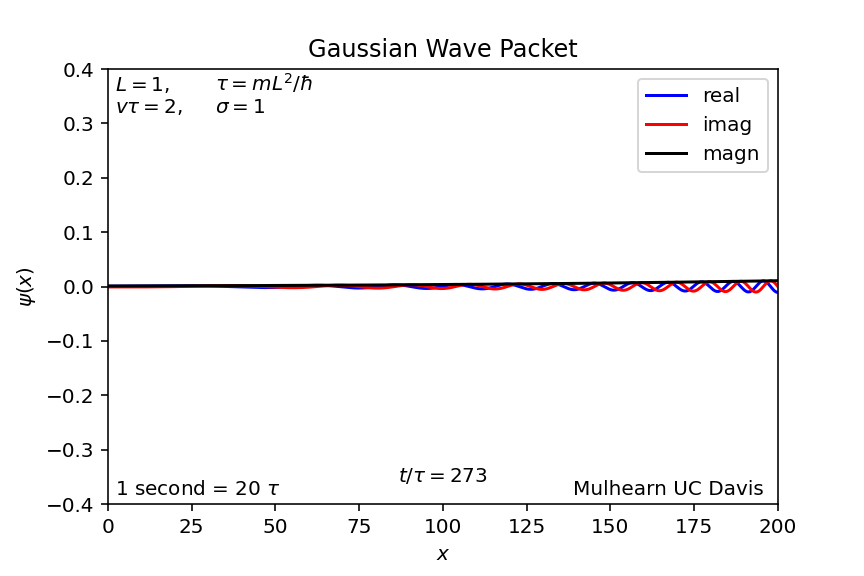

preparting Free Particle Scenes


In [31]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

WRITE_MP4 = False


# The frames per second is accurate when writing an mp3 file,
# but when just showing the animation the timing can lag.
tstep     = 1
fps       = 20
frame_ms  = 1000/fps
second_tau = fps*tstep

#uncomment for full resolution video:
if (WRITE_MP4):
    fig = plt.figure(figsize=(16, 9), dpi=(1920/16))

ax = plt.gca()  # Get current axes
la , = ax. plot ([], [], "b-",label="real")
lb , = ax. plot ([], [], "r-",label="imag")
lc , = ax. plot ([], [], "k-",label="magn")

# offload to manage scene
xf = np.linspace(0,200,1000)

init_scenes(ax)

def animate (i):
    update_scene(i)
    la. set_data (xf,np.real(psif))
    lb. set_data (xf,np.imag(psif))
    lc. set_data (xf,np.absolute(psif))    
    plt.legend()


anim = FuncAnimation (plt .gcf () , animate , frames =total_frames , interval =20 , repeat = False )
#anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =frame_ms , repeat = False )
    
# Set up formatting for the movie files
if (WRITE_MP4):
    Writer = writers['ffmpeg']
    writer = Writer(fps=fps, metadata=dict(artist='Mulhearn'), bitrate=3600)
    anim.save(file_name+".mp4", writer=writer)



wave_packet.mp4
